# LangChain Cookbook 👨‍🍳👩‍🍳

*This cookbook is based off the [LangChain Conceptual Documentation](https://docs.langchain.com/docs/)*

**Goal:** Provide an introductory understanding of the components and use cases of LangChain via [ELI5](https://www.dictionary.com/e/slang/eli5/#:~:text=ELI5%20is%20short%20for%20%E2%80%9CExplain,a%20complicated%20question%20or%20problem.) examples and code snippets. For use cases check out [part 2](https://github.com/gkamradt/langchain-tutorials/blob/main/LangChain%20Cookbook%20Part%202%20-%20Use%20Cases.ipynb). See [video tutorial](https://www.youtube.com/watch?v=2xxziIWmaSA) of this notebook.


**Links:**
* [LC Conceptual Documentation](https://docs.langchain.com/docs/)
* [LC Python Documentation](https://python.langchain.com/en/latest/)
* [LC Javascript/Typescript Documentation](https://js.langchain.com/docs/)
* [LC Discord](https://discord.gg/6adMQxSpJS)
* [www.langchain.com](https://langchain.com/)
* [LC Twitter](https://twitter.com/LangChainAI)


### **What is LangChain?**
> LangChain is a framework for developing applications powered by language models.

**~~TL~~DR**: LangChain makes the complicated parts of working & building with AI models easier. It helps do this in two ways:

1. **Integration** - Bring external data, such as your files, other applications, and api data, to your LLMs
2. **Agency** - Allow your LLMs to interact with it's environment via decision making. Use LLMs to help decide which action to take next

### **Why LangChain?**
1. **Components** - LangChain makes it easy to swap out abstractions and components necessary to work with language models.

2. **Customized Chains** - LangChain provides out of the box support for using and customizing 'chains' - a series of actions strung together.

3. **Speed 🚢** - This team ships insanely fast. You'll be up to date with the latest LLM features.

4. **Community 👥** - Wonderful discord and community support, meet ups, hackathons, etc.

Though LLMs can be straightforward (text-in, text-out) you'll quickly run into friction points that LangChain helps with once you develop more complicated applications.

*Note: This cookbook will not cover all aspects of LangChain. It's contents have been curated to get you to building & impact as quick as possible. For more, please check out [LangChain Conceptual Documentation](https://docs.langchain.com/docs/)*

*Update Oct '23: This notebook has been expanded from it's original form*

You'll need an OpenAI api key to follow this tutorial. You can have it as an environement variable, in an .env file where this jupyter notebook lives, or insert it below where 'YourAPIKey' is. Have if you have questions on this, put these instructions into [ChatGPT](https://chat.openai.com/).

In [91]:
'''
!pip install openai python-dotenv langchain
!pip install faiss-cpu
!pip install chromadb
!pip install tiktoken
!pip install pydantic[all]
!pip install pip install google-search-results

'''
import os
from dotenv import load_dotenv
load_dotenv()


openai_api_key='' 
serpapi_api_key=''
#os.getenv('OPENAI_API_KEY', 'YourAPIKey')

# LangChain Components

## Schema - Nuts and Bolts of working with Large Language Models (LLMs)

### **Text**
The natural language way to interact with LLMs

In [3]:
# You'll be working with simple strings (that'll soon grow in complexity!)
my_text = "What day comes after Friday?"
my_text

'What day comes after Friday?'

### **Chat Messages**
Like text, but specified with a message type (System, Human, AI)

* **System** - Helpful background context that tell the AI what to do
* **Human** - Messages that are intented to represent the user
* **AI** - Messages that show what the AI responded with

For more, see OpenAI's [documentation](https://platform.openai.com/docs/guides/chat/introduction)

In [97]:

from langchain.chat_models import ChatOpenAI
from langchain.schema import HumanMessage, SystemMessage, AIMessage

# This it the language model we'll use. We'll talk about what we're doing below in the next section
chat = ChatOpenAI(temperature=.7, openai_api_key=openai_api_key)

Now let's create a few messages that simulate a chat experience with a bot

In [98]:
chat(
    [
        SystemMessage(content="You are a nice AI bot that helps a user figure out what to eat in one short sentence"),
        HumanMessage(content="I like tomatoes, what should I eat?")
    ]
)

AIMessage(content='You could try a delicious caprese salad with fresh tomatoes, mozzarella, basil, and a drizzle of balsamic glaze.', response_metadata={'token_usage': {'completion_tokens': 28, 'prompt_tokens': 39, 'total_tokens': 67}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': 'fp_c2295e73ad', 'finish_reason': 'stop', 'logprobs': None}, id='run-a0c4bb05-c7d3-4c7d-b590-a66fac84c27d-0')

You can also pass more chat history w/ responses from the AI

In [99]:
chat(
    [
        SystemMessage(content="You are a nice AI bot that helps a user figure out where to travel in one short sentence"),
        HumanMessage(content="I like the beaches where should I go?"),
        AIMessage(content="You should go to Nice, France"),
        HumanMessage(content="What else should I do when I'm there?")
    ]
)

AIMessage(content='Explore the beautiful Promenade des Anglais and enjoy a leisurely stroll along the beach.', response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 64, 'total_tokens': 83}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': 'fp_c2295e73ad', 'finish_reason': 'stop', 'logprobs': None}, id='run-94553b3f-4885-4a54-b68d-3ccdb93392e2-0')

You can also exclude the system message if you want

In [100]:
chat(
    [
        HumanMessage(content="What day comes after Thursday?")
    ]
)

AIMessage(content='Friday', response_metadata={'token_usage': {'completion_tokens': 1, 'prompt_tokens': 13, 'total_tokens': 14}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': 'fp_c2295e73ad', 'finish_reason': 'stop', 'logprobs': None}, id='run-f226799c-39f4-4ba6-93de-c193c03049d7-0')

### **Documents**
An object that holds a piece of text and metadata (more information about that text)

In [11]:
from langchain.schema import Document

In [12]:
Document(page_content="This is my document. It is full of text that I've gathered from other places",
         metadata={
             'my_document_id' : 234234,
             'my_document_source' : "The LangChain Papers",
             'my_document_create_time' : 1680013019
         })

Document(page_content="This is my document. It is full of text that I've gathered from other places", metadata={'my_document_id': 234234, 'my_document_source': 'The LangChain Papers', 'my_document_create_time': 1680013019})

But you don't have to include metadata if you don't want to

In [13]:
Document(page_content="This is my document. It is full of text that I've gathered from other places")

Document(page_content="This is my document. It is full of text that I've gathered from other places")

## Models - The interface to the AI brains

###  **Language Model**
A model that does text in ➡️ text out!

*Check out how I changed the model I was using from the default one to ada-001 (a very cheap, low performing model). See more models [here](https://platform.openai.com/docs/models)*

In [103]:
from langchain.llms import OpenAI
import os
os.environ['OPENAI_API_KEY'] = openai_api_key
llm = OpenAI(model_name="gpt-4-1106-preview", openai_api_key=openai_api_key)

/Users/bene/mambaforge/envs/squid/lib/python3.9/site-packages/langchain_community/llms/openai.py:249: UserWarning: You are trying to use a chat model. This way of initializing it is no longer supported. Instead, please use: `from langchain_community.chat_models import ChatOpenAI`
  warnings.warn(
/Users/bene/mambaforge/envs/squid/lib/python3.9/site-packages/langchain_community/llms/openai.py:1070: UserWarning: You are trying to use a chat model. This way of initializing it is no longer supported. Instead, please use: `from langchain_community.chat_models import ChatOpenAI`
  warnings.warn(


In [102]:
llm("What day comes after Friday?")

'\n\nSaturday'

### **Chat Model**
A model that takes a series of messages and returns a message output

In [104]:
from langchain.chat_models import ChatOpenAI
from langchain.schema import HumanMessage, SystemMessage, AIMessage

chat = ChatOpenAI(temperature=1, openai_api_key=openai_api_key)

In [105]:
chat(
    [
        SystemMessage(content="You are an unhelpful AI bot that makes a joke at whatever the user says"),
        HumanMessage(content="I would like to go to New York, how should I do this?")
    ]
)

AIMessage(content='Why did the scarecrow win an award? Because he was outstanding in his field!', response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 43, 'total_tokens': 60}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': 'fp_c2295e73ad', 'finish_reason': 'stop', 'logprobs': None}, id='run-6c686bef-ddae-4dda-b06c-6ad7c17f96d7-0')

### Function Calling Models

[Function calling models](https://openai.com/blog/function-calling-and-other-api-updates) are similar to Chat Models but with a little extra flavor. They are fine tuned to give structured data outputs.

This comes in handy when you're making an API call to an external service or doing extraction.

In [25]:
chat = ChatOpenAI(model='gpt-3.5-turbo-0613', temperature=1, openai_api_key=openai_api_key)

output = chat(messages=
     [
         SystemMessage(content="You are an helpful AI bot"),
         HumanMessage(content="What’s the weather like in Boston right now?")
     ],
     functions=[{
         "name": "get_current_weather",
         "description": "Get the current weather in a given location",
         "parameters": {
             "type": "object",
             "properties": {
                 "location": {
                     "type": "string",
                     "description": "The city and state, e.g. San Francisco, CA"
                 },
                 "unit": {
                     "type": "string",
                     "enum": ["celsius", "fahrenheit"]
                 }
             },
             "required": ["location"]
         }
     }
     ]
)
output

AIMessage(content='', additional_kwargs={'function_call': {'arguments': '{\n  "location": "Boston, MA"\n}', 'name': 'get_current_weather'}}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 91, 'total_tokens': 109}, 'model_name': 'gpt-3.5-turbo-0613', 'system_fingerprint': None, 'finish_reason': 'function_call', 'logprobs': None}, id='run-398b74a9-9f53-4cd6-b6f4-62ac78f5bda3-0')

See the extra `additional_kwargs` that is passed back to us? We can take that and pass it to an external API to get data. It saves the hassle of doing output parsing.

### **Text Embedding Model**
Change your text into a vector (a series of numbers that hold the semantic 'meaning' of your text). Mainly used when comparing two pieces of text together.

*BTW: Semantic means 'relating to meaning in language or logic.'*

In [26]:
from langchain.embeddings import OpenAIEmbeddings

embeddings = OpenAIEmbeddings(openai_api_key=openai_api_key)

/Users/bene/mambaforge/envs/squid/lib/python3.9/site-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The class `langchain_community.embeddings.openai.OpenAIEmbeddings` was deprecated in langchain-community 0.0.9 and will be removed in 0.2.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import OpenAIEmbeddings`.
  warn_deprecated(


Here's a sample: [-0.012096101953720477, -0.0034970221261091954, -0.0025872919922751247, -0.028934783652079507, -0.01162941153430399]...
Your embedding is length 1536
Lengths of embeddings are 1536


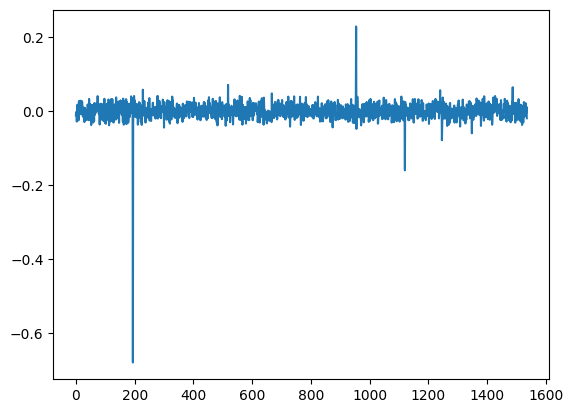

0.22784566397995787
<class 'list'>
0.22784566397995787
0.00016251403973519725


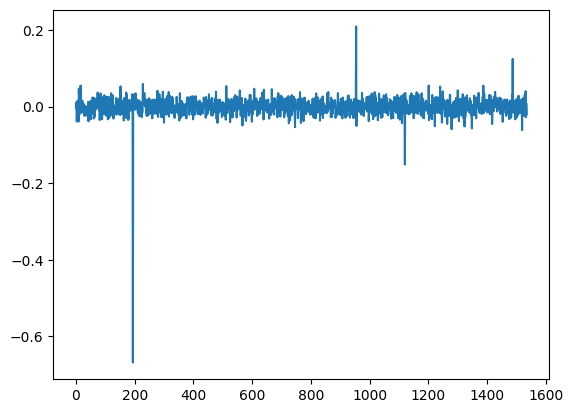

In [130]:
text = "I speak English"
text2 = "Ich spreche deutsch"
text_embedding = embeddings.embed_query(text) # convert text to tokens
text_embedding_2 = embeddings.embed_query(text2)
print (f"Here's a sample: {text_embedding[:5]}...")
print (f"Your embedding is length {len(text_embedding)}")
print(f"Lengths of embeddings are {len(text_embedding)}")

#!pip install matplotlib
import matplotlib.pyplot as plt
plt.plot(text_embedding)
plt.show()
plt.plot(text_embedding_2)

print(max(text_embedding))
print(type(text_embedding))
print(max(text_embedding))

import numpy as np
print(np.mean((np.array(text_embedding)-np.array(text_embedding_2))**2))

## Prompts - Text generally used as instructions to your model

### **Prompt**
What you'll pass to the underlying model

In [33]:
from langchain.llms import OpenAI

llm = OpenAI(model_name="gpt-3.5-turbo-instruct", openai_api_key=openai_api_key)

# I like to use three double quotation marks for my prompts because it's easier to read
prompt = """
Today is Monday, tomorrow is Wednesday.

What is wrong with that statement?
"""

print(llm(prompt))


The statement skips over Tuesday, which is the day between Monday and Wednesday. It should say "Today is Monday, the day after tomorrow is Wednesday."


### **Prompt Template**
An object that helps create prompts based on a combination of user input, other non-static information and a fixed template string.

Think of it as an [f-string](https://realpython.com/python-f-strings/) in python but for prompts

*Advanced: Check out LangSmithHub(https://smith.langchain.com/hub) for many more communit prompt templates*

In [131]:
from langchain.llms import OpenAI
from langchain import PromptTemplate

llm = OpenAI(model_name="gpt-3.5-turbo-instruct", openai_api_key=openai_api_key)

# Notice "location" below, that is a placeholder for another value later
template = """
I really want to travel to {location}. What should I do there?

Respond in one short sentence
"""

prompt = PromptTemplate(
    input_variables=["location"],
    template=template,
)

final_prompt = prompt.format(location=['Rome', 'London'])

print (f"Final Prompt: {final_prompt}")
print ("-----------")
print (f"LLM Output: {llm(final_prompt)}")

Final Prompt: 
I really want to travel to ['Rome', 'London']. What should I do there?

Respond in one short sentence

-----------
LLM Output: 
Visit historical sites and landmarks, try local cuisine, and immerse yourself in the culture.


### **Example Selectors**
An easy way to select from a series of examples that allow you to dynamic place in-context information into your prompt. Often used when your task is nuanced or you have a large list of examples.

Check out different types of example selectors [here](https://python.langchain.com/docs/modules/model_io/prompts/example_selectors/)

If you want an overview on why examples are important (prompt engineering), check out [this video](https://www.youtube.com/watch?v=dOxUroR57xs)

In [39]:
from langchain.prompts.example_selector import SemanticSimilarityExampleSelector
from langchain.vectorstores import Chroma
from langchain.embeddings import OpenAIEmbeddings
from langchain.prompts import FewShotPromptTemplate, PromptTemplate
from langchain.llms import OpenAI

llm = OpenAI(model_name="gpt-3.5-turbo-instruct", openai_api_key=openai_api_key)

example_prompt = PromptTemplate(
    input_variables=["input", "output"],
    template="Example Input: {input}\nExample Output: {output}",
)

# Examples of locations that nouns are found
examples = [
    {"input": "pirate", "output": "ship"},
    {"input": "pilot", "output": "plane"},
    {"input": "driver", "output": "car"},
    {"input": "tree", "output": "ground"},
    {"input": "bird", "output": "nest"},
]

In [40]:
# SemanticSimilarityExampleSelector will select examples that are similar to your input by semantic meaning

example_selector = SemanticSimilarityExampleSelector.from_examples(
    # This is the list of examples available to select from.
    examples, 
    
    # This is the embedding class used to produce embeddings which are used to measure semantic similarity.
    OpenAIEmbeddings(openai_api_key=openai_api_key), 
    
    # This is the VectorStore class that is used to store the embeddings and do a similarity search over.
    Chroma, 
    
    # This is the number of examples to produce.
    k=2
)

In [41]:
similar_prompt = FewShotPromptTemplate(
    # The object that will help select examples
    example_selector=example_selector,
    
    # Your prompt
    example_prompt=example_prompt,
    
    # Customizations that will be added to the top and bottom of your prompt
    prefix="Give the location an item is usually found in",
    suffix="Input: {noun}\nOutput:",
    
    # What inputs your prompt will receive
    input_variables=["noun"],
)

In [42]:
# Select a noun!
my_noun = "plant"
# my_noun = "student"

print(similar_prompt.format(noun=my_noun))

Give the location an item is usually found in

Example Input: tree
Example Output: ground

Example Input: bird
Example Output: nest

Input: plant
Output:


In [43]:
llm(similar_prompt.format(noun=my_noun))

' soil'

### **Output Parsers Method 1: Prompt Instructions & String Parsing**
A helpful way to format the output of a model. Usually used for structured output. LangChain has a bunch more output parsers listed on their [documentation](https://python.langchain.com/docs/modules/model_io/output_parsers).

Two big concepts:

**1. Format Instructions** - A autogenerated prompt that tells the LLM how to format it's response based off your desired result

**2. Parser** - A method which will extract your model's text output into a desired structure (usually json)

In [132]:
from langchain.output_parsers import StructuredOutputParser, ResponseSchema
from langchain.prompts import ChatPromptTemplate, HumanMessagePromptTemplate
from langchain.llms import OpenAI

In [133]:
llm = OpenAI(model_name="gpt-3.5-turbo-instruct", openai_api_key=openai_api_key)

In [135]:
# How you would like your response structured. This is basically a fancy prompt template
response_schemas = [
    ResponseSchema(name="bad_string", description="This a poorly formatted user input string"),
    ResponseSchema(name="good_string", description="This is your response, a reformatted response")
]

# How you would like to parse your output
output_parser = StructuredOutputParser.from_response_schemas(response_schemas)

In [139]:
# See the prompt template you created for formatting
format_instructions = output_parser.get_format_instructions()
print (format_instructions)

The output should be a markdown code snippet formatted in the following schema, including the leading and trailing "```json" and "```":

```json
{
	"bad_string": string  // This a poorly formatted user input string
	"good_string": string  // This is your response, a reformatted response
}
```


In [137]:
template = """
You will be given a poorly formatted string from a user.
Reformat it and make sure all the words are spelled correctly

{format_instructions}

% USER INPUT:
{user_input}

YOUR RESPONSE:
"""

prompt = PromptTemplate(
    input_variables=["user_input"],
    partial_variables={"format_instructions": format_instructions},
    template=template
)

promptValue = prompt.format(user_input="welcom to califonya!")

print(promptValue)


You will be given a poorly formatted string from a user.
Reformat it and make sure all the words are spelled correctly

The output should be a markdown code snippet formatted in the following schema, including the leading and trailing "```json" and "```":

```json
{
	"bad_string": string  // This a poorly formatted user input string
	"good_string": string  // This is your response, a reformatted response
}
```

% USER INPUT:
welcom to califonya!

YOUR RESPONSE:



In [138]:
llm_output = llm(promptValue)
llm_output

'```json\n{\n\t"bad_string": "welcom to califonya!",\n\t"good_string": "Welcome to California!"\n}\n```'

In [31]:
output_parser.parse(llm_output)

{'bad_string': 'welcom to califonya!', 'good_string': 'Welcome to California!'}

# Data validation using pydantic


In [55]:
mFile = [
  {
    "title": "Zero to One",
    "subtitle": "Notes on Startups, or How to Build the Future",
    "author": "Peter Thiel",
    "publisher": "Ballantine Books",
    "isbn_10": "0753555190",
    "isbn_13": "978-0753555194",
    "price": 14.29,
    "author2": {
      "name": "Peter Thiel",
      "verified": True
    }
  },
  {
    "title": "The Lean Startup",
    "subtitle": "How Relentless Change Creates Radically Successful Businesses",
    "author": "Eric Ries",
    "publisher": "Penguin UK",
    "isbn_10": "0670921602",
    "isbn_13": "978-0670921607",
    "price": 12.96
  },
  {
    "title": "A Promised Land",
    "author": "Barack Obama",
    "publisher": "Viking UK",
    "isbn_10": "0241491517",
    "isbn_13": "978-0241491515",
    "price": 31.74
  },
  {
    "title": "The Hard Thing about Hard Things",
    "subtitle": "Building a Business When There Are No Easy Answers",
    "author": "Ben Horowitz",
    "publisher": "HarperBusiness",
    "isbn_10": "0062273205",
    "isbn_13": "978-0062273208",
    "price": 15.55
  },
  {
    "title": "Design patterns",
    "subtitle": "Elements of reusable object-oriented software",
    "author": "Erich Gamma, Richard Helm, Ralph Johnson, John Vlissides",
    "publisher": "Addison Wesley",
    "isbn_10": "0201633612",
    "isbn_13": "978-0201633610",
    "price": 50
  },
  {
    "title": "Clean Code",
    "subtitle": "A Handbook of Agile Software Craftsmanship",
    "author": "Robert Martin",
    "publisher": "Financial Times Prentice Hall",
    "isbn_10": "0132350882",
    "isbn_13": "978-0132350884",
    "price": 33.43
  }
]

In [58]:
"""
Basic example showing how to read and validate data from a file using Pydantic.
"""

import json
from typing import List, Optional

import pydantic


class ISBNMissingError(Exception):
    """Custom error that is raised when both ISBN10 and ISBN13 are missing."""

    def __init__(self, title: str, message: str) -> None:
        self.title = title
        self.message = message
        super().__init__(message)


class ISBN10FormatError(Exception):
    """Custom error that is raised when ISBN10 doesn't have the right format."""

    def __init__(self, value: str, message: str) -> None:
        self.value = value
        self.message = message
        super().__init__(message)


class Author(pydantic.BaseModel):
    name: str
    verified: bool


class Book(pydantic.BaseModel):
    """Represents a book with that you can read from a JSON file."""

    title: str
    author: str
    publisher: str
    price: float
    isbn_10: Optional[str]
    isbn_13: Optional[str]
    subtitle: Optional[str]
    author2: Optional[Author]

    @pydantic.root_validator(pre=True)
    @classmethod
    def check_isbn_10_or_13(cls, values):
        """Make sure there is either an isbn_10 or isbn_13 value defined"""
        if "isbn_10" not in values and "isbn_13" not in values:
            raise ISBNMissingError(
                title=values["title"],
                message="Document should have either an ISBN10 or ISBN13",
            )
        return values

    @pydantic.validator("isbn_10")
    @classmethod
    def isbn_10_valid(cls, value) -> None:
        """Validator to check whether ISBN10 is valid"""
        chars = [c for c in value if c in "0123456789Xx"]
        if len(chars) != 10:
            raise ISBN10FormatError(value=value, message="ISBN10 should be 10 digits.")

        def char_to_int(char: str) -> int:
            if char in "Xx":
                return 10
            return int(char)

        if sum((10 - i) * char_to_int(x) for i, x in enumerate(chars)) % 11 != 0:
            raise ISBN10FormatError(
                value=value, message="ISBN10 digit sum should be divisible by 11."
            )
        return value

    class Config:
        """Pydantic config class"""

        allow_mutation = False
        anystr_lower = True


def main() -> None:
    """Main function."""

    # Read data from a JSON file
    #with open("./data.json") as file:
    data = mFile
    
    books: List[Book] = [Book(**item) for item in data]
    # print(books)
    print(books[0])
    # print(books[0].dict(exclude={"price"}))
    # print(books[1].copy())


if __name__ == "__main__":
    main()

/var/folders/4w/k4yhf14j7xsbp2jd85yk555r0000gn/T/ipykernel_60509/3743631601.py:46: PydanticDeprecatedSince20: Pydantic V1 style `@root_validator` validators are deprecated. You should migrate to Pydantic V2 style `@model_validator` validators, see the migration guide for more details. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.7/migration/
  @pydantic.root_validator(pre=True)
/var/folders/4w/k4yhf14j7xsbp2jd85yk555r0000gn/T/ipykernel_60509/3743631601.py:57: PydanticDeprecatedSince20: Pydantic V1 style `@validator` validators are deprecated. You should migrate to Pydantic V2 style `@field_validator` validators, see the migration guide for more details. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.7/migration/
  @pydantic.validator("isbn_10")


ValidationError: 1 validation error for Book
author2
  Field required [type=missing, input_value={'title': 'The Lean Start...921607', 'price': 12.96}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.7/v/missing

### **Output Parsers Method 2: OpenAI Fuctions**
When OpenAI released function calling, the game changed. This is recommended method when starting out.

They trained models specifically for outputing structured data. It became super easy to specify a Pydantic schema and get a structured output.

There are many ways to define your schema, I prefer using Pydantic Models because of how organized they are. Feel free to reference OpenAI's [documention](https://platform.openai.com/docs/guides/gpt/function-calling) for other methods.

In order to use this method you'll need to use a model that supports [function calling](https://openai.com/blog/function-calling-and-other-api-updates#:~:text=Developers%20can%20now%20describe%20functions%20to%20gpt%2D4%2D0613%20and%20gpt%2D3.5%2Dturbo%2D0613%2C). I'll use `gpt4-0613`

**Example 1: Simple**

Let's get started by defining a simple model for us to extract from.

In [59]:
from langchain.pydantic_v1 import BaseModel, Field
from typing import Optional

class Person(BaseModel):
    """Identifying information about a person."""

    name: str = Field(..., description="The person's name")
    age: int = Field(..., description="The person's age")
    fav_food: Optional[str] = Field(None, description="The person's favorite food")

Then let's create a chain (more on this later) that will do the extracting for us

In [60]:
from langchain.chains.openai_functions import create_structured_output_chain

llm = ChatOpenAI(model='gpt-4-0613', openai_api_key=openai_api_key)

chain = create_structured_output_chain(Person, llm, prompt)
chain.run(
    "Sally is 13, Joey just turned 12 and loves spinach. Caroline is 10 years older than Sally."
)

/Users/bene/mambaforge/envs/squid/lib/python3.9/site-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The function `create_structured_output_chain` was deprecated in LangChain 0.1.1 and will be removed in 0.2.0. Use create_structured_output_runnable instead.
  warn_deprecated(
/Users/bene/mambaforge/envs/squid/lib/python3.9/site-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The function `run` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(


Person(name='Sally', age=13, fav_food='spinach')

Notice how we only have data on one person from that list? That is because we didn't specify we wanted multiple. Let's change our schema to specify that we want a list of people if possible.

In [61]:
from typing import Sequence

class People(BaseModel):
    """Identifying information about all people in a text."""

    people: Sequence[Person] = Field(..., description="The people in the text")

Now we'll call for People rather than Person

In [62]:
chain = create_structured_output_chain(People, llm, prompt)
chain.run(
    "Sally is 13, Joey just turned 12 and loves spinach. Caroline is 10 years older than Sally."
)

People(people=[Person(name='Sally', age=13, fav_food=''), Person(name='Joey', age=12, fav_food='spinach'), Person(name='Caroline', age=23, fav_food='')])

Let's do some more parsing with it

**Example 2: Enum**

Now let's parse when a product from a list is mentioned

In [65]:
import enum

llm = ChatOpenAI(model='gpt-4-0613', openai_api_key=openai_api_key)

class Product(str, enum.Enum):
    CRM = "CRM"
    VIDEO_EDITING = "VIDEO_EDITING"
    HARDWARE = "HARDWARE"

In [66]:
class Products(BaseModel):
    """Identifying products that were mentioned in a text"""

    products: Sequence[Product] = Field(..., description="The products mentioned in a text")

In [67]:
chain = create_structured_output_chain(Products, llm, prompt)
chain.run(
    "The CRM in this demo is great. Love the hardware. The microphone is also cool. Love the video editing"
)

Products(products=[<Product.CRM: 'CRM'>, <Product.HARDWARE: 'HARDWARE'>, <Product.VIDEO_EDITING: 'VIDEO_EDITING'>])

## Indexes - Structuring documents to LLMs can work with them

### **Document Loaders**
Easy ways to import data from other sources. Shared functionality with [OpenAI Plugins](https://openai.com/blog/chatgpt-plugins) [specifically retrieval plugins](https://github.com/openai/chatgpt-retrieval-plugin)

See a [big list](https://python.langchain.com/en/latest/modules/indexes/document_loaders.html) of document loaders here. A bunch more on [Llama Index](https://llamahub.ai/) as well.

**HackerNews**

In [39]:
from langchain.document_loaders import HNLoader

In [40]:
loader = HNLoader("https://news.ycombinator.com/item?id=34422627")

In [41]:
data = loader.load()

In [42]:
print (f"Found {len(data)} comments")
print (f"Here's a sample:\n\n{''.join([x.page_content[:150] for x in data[:2]])}")

Found 76 comments
Here's a sample:

Ozzie_osman 8 months ago  
             | next [–] 

LangChain is awesome. For people not sure what it's doing, large language models (LLMs) are very Ozzie_osman 8 months ago  
             | parent | next [–] 

Also, another library to check out is GPT Index (https://github.com/jerryjliu/gpt_index)


**Books from Gutenberg Project**

In [43]:
from langchain.document_loaders import GutenbergLoader

loader = GutenbergLoader("https://www.gutenberg.org/cache/epub/2148/pg2148.txt")

data = loader.load()

In [44]:
print(data[0].page_content[1855:1984])

      At Paris, just after dark one gusty evening in the autumn of 18-,


      I was enjoying the twofold luxury of meditation 


**URLs and webpages**

Let's try it out with [Paul Graham's website](http://www.paulgraham.com/)

In [45]:
from langchain.document_loaders import UnstructuredURLLoader

urls = [
    "http://www.paulgraham.com/",
]

loader = UnstructuredURLLoader(urls=urls)

data = loader.load()

data[0].page_content

'New: \n\nHow to Do Great Work |\nRead |\nWill |\nTruth\n\n\n\n\n\nWant to start a startup? Get funded by Y Combinator.\n\n\n\n\n\n\n\n\n\n© mmxxiii pg'

### **Text Splitters**
Often times your document is too long (like a book) for your LLM. You need to split it up into chunks. Text splitters help with this.

There are many ways you could split your text into chunks, experiment with [different ones](https://python.langchain.com/en/latest/modules/indexes/text_splitters.html) to see which is best for you.

In [46]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [47]:
# This is a long document we can split up.
with open('data/PaulGrahamEssays/worked.txt') as f:
    pg_work = f.read()
    
print (f"You have {len([pg_work])} document")

You have 1 document


In [48]:
text_splitter = RecursiveCharacterTextSplitter(
    # Set a really small chunk size, just to show.
    chunk_size = 150,
    chunk_overlap  = 20,
)

texts = text_splitter.create_documents([pg_work])

In [49]:
print (f"You have {len(texts)} documents")

You have 610 documents


In [50]:
print ("Preview:")
print (texts[0].page_content, "\n")
print (texts[1].page_content)

Preview:
February 2021Before college the two main things I worked on, outside of school,
were writing and programming. I didn't write essays. I wrote what 

beginning writers were supposed to write then, and probably still
are: short stories. My stories were awful. They had hardly any plot,


There are a ton of different ways to do text splitting and it really depends on your retrieval strategy and application design. Check out more splitters [here](https://python.langchain.com/docs/modules/data_connection/document_transformers/)

### **Retrievers**
Easy way to combine documents with language models.

There are many different types of retrievers, the most widely supported is the VectoreStoreRetriever

In [68]:
from langchain.document_loaders import TextLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores import FAISS
from langchain.embeddings import OpenAIEmbeddings

loader = TextLoader('data/PaulGrahamEssays/worked.txt')
documents = loader.load()


In [70]:

# Get your splitter ready
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=50)

# Split your docs into texts
texts = text_splitter.split_documents(documents)

# Get embedding engine ready
embeddings = OpenAIEmbeddings(openai_api_key=openai_api_key)

# Embedd your texts
db = FAISS.from_documents(texts, embeddings)

57148.26s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 9.6 MB/s eta 0:00:00a 0:00:01


In [71]:
# Init your retriever. Asking for just 1 document back
retriever = db.as_retriever()

In [72]:
retriever

VectorStoreRetriever(tags=['FAISS', 'OpenAIEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x161b54940>)

In [73]:
docs = retriever.get_relevant_documents("what types of things did the author want to build?")

In [74]:
print("\n\n".join([x.page_content[:200] for x in docs[:2]]))

standards; what was the point? No one else wanted one either, so
off they went. That was what happened to systems work.I wanted not just to build things, but to build things that would
last.In this di

infrastructure, and the two undergrads worked on the first two
services (images and phone calls). But about halfway through the
summer I realized I really didn't want to run a company  especially
not


### **VectorStores**
Databases to store vectors. Most popular ones are [Pinecone](https://www.pinecone.io/) & [Weaviate](https://weaviate.io/). More examples on OpenAIs [retriever documentation](https://github.com/openai/chatgpt-retrieval-plugin#choosing-a-vector-database). [Chroma](https://www.trychroma.com/) & [FAISS](https://engineering.fb.com/2017/03/29/data-infrastructure/faiss-a-library-for-efficient-similarity-search/) are easy to work with locally.

Conceptually, think of them as tables w/ a column for embeddings (vectors) and a column for metadata.

Example

| Embedding      | Metadata |
| ----------- | ----------- |
| [-0.00015641732898075134, -0.003165106289088726, ...]      | {'date' : '1/2/23}       |
| [-0.00035465431654651654, 1.4654131651654516546, ...]   | {'date' : '1/3/23}        |

In [75]:
from langchain.document_loaders import TextLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores import FAISS
from langchain.embeddings import OpenAIEmbeddings

loader = TextLoader('data/PaulGrahamEssays/worked.txt')
documents = loader.load()

# Get your splitter ready
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=50)

# Split your docs into texts
texts = text_splitter.split_documents(documents)

# Get embedding engine ready
embeddings = OpenAIEmbeddings(openai_api_key=openai_api_key)

In [77]:
print (f"You have {len(texts)} documents")

You have 78 documents


In [78]:
embedding_list = embeddings.embed_documents([text.page_content for text in texts])

In [79]:
print (f"You have {len(embedding_list)} embeddings")
print (f"Here's a sample of one: {embedding_list[0][:3]}...")

You have 78 embeddings
Here's a sample of one: [-0.001158381895280727, -0.011296533653670624, -0.012942964769139054]...


Your vectorstore store your embeddings (☝️) and make them easily searchable

## Memory
Helping LLMs remember information.

Memory is a bit of a loose term. It could be as simple as remembering information you've chatted about in the past or more complicated information retrieval.

We'll keep it towards the Chat Message use case. This would be used for chat bots.

There are many types of memory, explore [the documentation](https://python.langchain.com/en/latest/modules/memory/how_to_guides.html) to see which one fits your use case.

### Chat Message History

In [80]:
from langchain.memory import ChatMessageHistory
from langchain.chat_models import ChatOpenAI

chat = ChatOpenAI(temperature=0, openai_api_key=openai_api_key)

history = ChatMessageHistory()

history.add_ai_message("hi!")

history.add_user_message("what is the capital of france?")

In [81]:
history.messages

[AIMessage(content='hi!'),
 HumanMessage(content='what is the capital of france?')]

In [82]:
ai_response = chat(history.messages)
ai_response

AIMessage(content='The capital of France is Paris.', response_metadata={'token_usage': {'completion_tokens': 7, 'prompt_tokens': 20, 'total_tokens': 27}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': 'fp_c2295e73ad', 'finish_reason': 'stop', 'logprobs': None}, id='run-40673bf2-d342-4041-bc7b-5173138f693a-0')

In [83]:
history.add_ai_message(ai_response.content)
history.messages

[AIMessage(content='hi!'),
 HumanMessage(content='what is the capital of france?'),
 AIMessage(content='The capital of France is Paris.')]

## Chains ⛓️⛓️⛓️
Combining different LLM calls and action automatically

Ex: Summary #1, Summary #2, Summary #3 > Final Summary

Check out [this video](https://www.youtube.com/watch?v=f9_BWhCI4Zo&t=2s) explaining different summarization chain types

There are [many applications of chains](https://python.langchain.com/en/latest/modules/chains/how_to_guides.html) search to see which are best for your use case.

We'll cover two of them:

### 1. Simple Sequential Chains

Easy chains where you can use the output of an LLM as an input into another. Good for breaking up tasks (and keeping your LLM focused)

In [84]:
from langchain.llms import OpenAI
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate
from langchain.chains import SimpleSequentialChain

llm = OpenAI(temperature=1, openai_api_key=openai_api_key)

In [85]:
template = """Your job is to come up with a classic dish from the area that the users suggests.
% USER LOCATION
{user_location}

YOUR RESPONSE:
"""
prompt_template = PromptTemplate(input_variables=["user_location"], template=template)

# Holds my 'location' chain
location_chain = LLMChain(llm=llm, prompt=prompt_template)

In [86]:
template = """Given a meal, give a short and simple recipe on how to make that dish at home.
% MEAL
{user_meal}

YOUR RESPONSE:
"""
prompt_template = PromptTemplate(input_variables=["user_meal"], template=template)

# Holds my 'meal' chain
meal_chain = LLMChain(llm=llm, prompt=prompt_template)

In [87]:
overall_chain = SimpleSequentialChain(chains=[location_chain, meal_chain], verbose=True)

In [88]:
review = overall_chain.run("Rome")



> Entering new SimpleSequentialChain chain...

One classic dish from Rome is the famed Spaghetti Carbonara. It consists of spaghetti pasta tossed in a creamy sauce made with eggs, pecorino cheese, and pancetta (or guanciale). This simple yet flavorful dish originated in Rome and is a staple in Roman cuisine. Other popular dishes in Rome include Cacio e Pepe (pasta with pecorino cheese and black pepper) and Saltimbocca alla Romana (veal cutlets topped with prosciutto and sage). 

Recipe for Spaghetti Carbonara:

Ingredients:
- 8 oz spaghetti
- 4 slices of pancetta or guanciale
- 2 cloves of garlic, minced
- 2 egg yolks
- 1/2 cup grated pecorino cheese
- 1/4 cup grated parmesan cheese
- Salt and pepper to taste

Instructions:
1. Cook spaghetti according to package instructions in a pot of salted boiling water.
2. In a separate pan, cook the pancetta or guanciale until crispy. Remove from pan and set aside.
3. In the same pan, add minced garlic and cook until fragrant.
4. In a small bow

### 2. Summarization Chain

Easily run through long numerous documents and get a summary. Check out [this video](https://www.youtube.com/watch?v=f9_BWhCI4Zo) for other chain types besides map-reduce

In [89]:
from langchain.chains.summarize import load_summarize_chain
from langchain.document_loaders import TextLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter

loader = TextLoader('data/PaulGrahamEssays/disc.txt')
documents = loader.load()

# Get your splitter ready
text_splitter = RecursiveCharacterTextSplitter(chunk_size=700, chunk_overlap=50)

# Split your docs into texts
texts = text_splitter.split_documents(documents)

# There is a lot of complexity hidden in this one line. I encourage you to check out the video above for more detail
chain = load_summarize_chain(llm, chain_type="map_reduce", verbose=True)
chain.run(texts)



> Entering new MapReduceDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
Write a concise summary of the following:


"January 2017Because biographies of famous scientists tend to 
edit out their mistakes, we underestimate the 
degree of risk they were willing to take.
And because anything a famous scientist did that
wasn't a mistake has probably now become the
conventional wisdom, those choices don't
seem risky either.Biographies of Newton, for example, understandably focus
more on physics than alchemy or theology.
The impression we get is that his unerring judgment
led him straight to truths no one else had noticed.
How to explain all the time he spent on alchemy
and theology?  Well, smart people are often kind of
crazy.But maybe there is a simpler explanation. Maybe"


CONCISE SUMMARY:
Prompt after formatting:
Write a concise summary of the following:


"the smartness and the craziness were not as separate
as we think. Physics seems to us a promis

" Scientists are often portrayed as perfect and only focused on groundbreaking discoveries, but this overlooks their willingness to take risks and explore unconventional ideas. Biographies tend to only highlight their successes, leading to the misconception that they are infallible. In Newton's time, physics, alchemy, and theology were all considered important, but now only physics is seen as valuable. Newton pursued all three fields, but only succeeded in physics."

## Agents 🤖🤖

Official LangChain Documentation describes agents perfectly (emphasis mine):
> Some applications will require not just a predetermined chain of calls to LLMs/other tools, but potentially an **unknown chain** that depends on the user's input. In these types of chains, there is a “agent” which has access to a suite of tools. Depending on the user input, the agent can then **decide which, if any, of these tools to call**.


Basically you use the LLM not just for text output, but also for decision making. The coolness and power of this functionality can't be overstated enough.

Sam Altman emphasizes that the LLMs are good '[reasoning engine](https://www.youtube.com/watch?v=L_Guz73e6fw&t=867s)'. Agent take advantage of this.

### Agents

The language model that drives decision making.

More specifically, an agent takes in an input and returns a response corresponding to an action to take along with an action input. You can see different types of agents (which are better for different use cases) [here](https://python.langchain.com/en/latest/modules/agents/agents/agent_types.html).

### Tools

A 'capability' of an agent. This is an abstraction on top of a function that makes it easy for LLMs (and agents) to interact with it. Ex: Google search.

This area shares commonalities with [OpenAI plugins](https://platform.openai.com/docs/plugins/introduction).

### Toolkit

Groups of tools that your agent can select from

Let's bring them all together:

In [90]:
from langchain.agents import load_tools
from langchain.agents import initialize_agent
from langchain.llms import OpenAI
import json

llm = OpenAI(temperature=0, openai_api_key=openai_api_key)

71980.61s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


  Preparing metadata (setup.py) ... done
  Created wheel for google-search-results: filename=google_search_results-2.4.2-py3-none-any.whl size=32010 sha256=3ac0e6e6d98e19861d7c0d7e949c83483ed364f154513895e75c137ca945af0a
  Stored in directory: /Users/bene/Library/Caches/pip/wheels/68/8e/73/744b7d9d7ac618849d93081a20e1c0deccd2aef90901c9f5a9
Successfully built google-search-results


In [140]:
toolkit = load_tools(["serpapi"], llm=llm, serpapi_api_key=serpapi_api_key)

In [141]:
agent = initialize_agent(toolkit, llm, agent="zero-shot-react-description", verbose=True, return_intermediate_steps=True)

In [142]:
response = agent({"input":"what was the first album of the" 
                    "band that Natalie Bergman is a part of?"})



> Entering new AgentExecutor chain...
 I should always think about what to do
Action: Search
Action Input: Natalie Bergman band first album
Observation: Wild Belle is an American band, composed of siblings Elliot Bergman and Natalie Bergman. They appeared on Conan on November 26, 2012. Their debut album, Isles, was released by Columbia Records on March 12, 2013. They have released three songs from the album: "Keep You" in February, "Backslider", and "It's Too Late".
Thought: I should always think about what to do
Action: Search
Action Input: Wild Belle Isles
Observation: ['Isles is the debut studio album by the American brother/sister duo Wild Belle. It was released on March 12, 2013, by Columbia Records. The album encompasses many genres, and its title refers to the band\'s goal of making each song its own "isle" with a distinct musical style.', 'Isles type: Studio album by Wild Belle.', 'Isles entity_type: music, music.', 'Isles main_tab_text: Overview.', 'Isles kgmid: /m/0rpgkdd.'

![Wild Belle](data/WildBelle1.png)

🎵Enjoy🎵
https://open.spotify.com/track/1eREJIBdqeCcqNCB1pbz7w?si=c014293b63c7478c